In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
import warnings
 
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumBarunGothic') 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **0. CJ DATA 생성**


In [ ]:
cj = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/CJ/cj.xlsx', error_bad_lines = False, parse_dates=['DL_YMD'])
dong = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/전체동별클러스터링.csv', sep = ',', encoding='UTF-8')
dong_cd = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/SC/SC동코드변환.csv', sep = ',',encoding='UTF-8')

In [ ]:
cj['CTGG_CD'] = cj['CTGG_CD'].astype('category')
cj['HDNG_CD'] = cj['HDNG_CD'].astype('category')
cj['DL_GD_LCLS_CD'] = cj['DL_GD_LCLS_CD'].astype('category')
cj['CTPV_CD'] = cj['CTPV_CD'].astype('category')
CJ_C = cj

In [ ]:
#cj.groupby(['DL_GD_LCLS_NM']).sum().sort_values(by='INVC_CONT',ascending=False).to_list()
cj_cat_list = ['DL_YMD','식품', '패션의류', '생활건강', '화장품/미용', '디지털/가전', '패션잡화', '도서/음반', '가구/인테리어','스포츠/레저', '출산/육아']
cj = cj.groupby(['DL_YMD','DL_GD_LCLS_NM']).sum().unstack().fillna(0).droplevel(0, axis=1).reset_index(drop=False).reindex(columns=cj_cat_list)
cj.head()
CJ=cj

# **1. 상품 대분류별 일별 물류량**


Text(0.5, 1.0, 'CJ 일별 물류량')

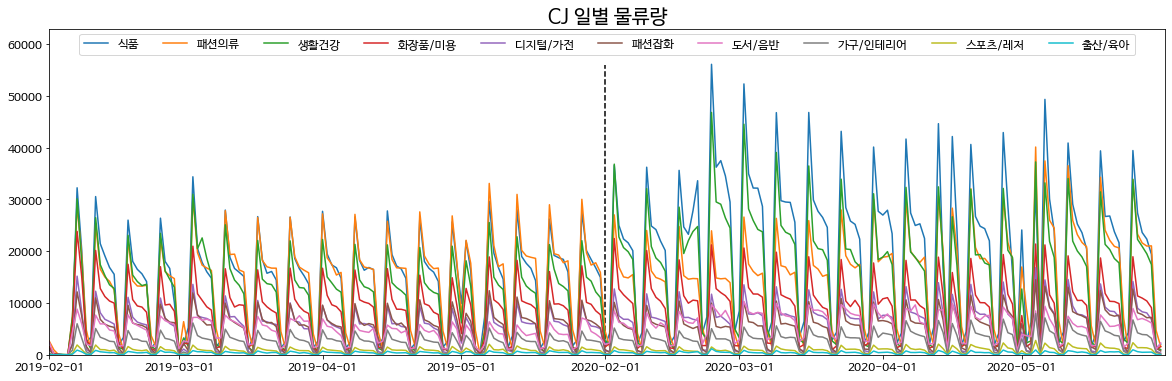

In [ ]:
cj_a = CJ
x_tick_date = ['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01']
x_tick_location = np.array([0,28,59,89,120,149,180,210]) #매월 1일

plt.figure(figsize=(20, 6))

for i in range(len(cj_a.columns)-1):
  plt.plot(cj_a.index, cj_a.iloc[:,i+1],label=cj_a.columns[i+1])

plt.xlim(0,241)
plt.ylim(0,63000)
plt.yticks(fontsize=12)
plt.xticks(x_tick_location,x_tick_date,fontsize=12)
plt.legend(cj_a.columns[1:],loc='lower center',bbox_to_anchor=(0.5, 0.9),ncol=len(cj.columns)-1,fontsize=12)
plt.vlines(x=120,ymin=0, ymax=56000, colors='black', linestyles='--')
plt.title('CJ 일별 물류량',fontsize=20)

# **2. 상품대분류별 주별 물류량 증감률**

In [ ]:
# 설날 2019 2월 4,5,6일 보정
cj = CJ.set_index('DL_YMD')
cj.loc['2019-02-04',:] = (cj.loc['2019-02-11',:] + cj.loc['2019-02-18',:])/2
cj.loc['2019-02-05',:] = (cj.loc['2019-02-12',:] + cj.loc['2019-02-19',:])/2
cj.loc['2019-02-06',:] = (cj.loc['2019-02-13',:] + cj.loc['2019-02-20',:])/2
cj = cj.reset_index(drop=False).query(" DL_YMD not in ['2019-02-01','2020-05-30','2020-05-31']").set_index('DL_YMD',drop=True)
cj.head()

DL_GD_LCLS_NM,식품,패션의류,생활건강,화장품/미용,디지털/가전,패션잡화,도서/음반,가구/인테리어,스포츠/레저,출산/육아
DL_YMD,,,,,,,,,,
2019-02-02,109.0,927.0,133.0,281.0,60.0,102.0,10.0,17.0,6.0,1.0
2019-02-03,157.0,27.0,80.0,25.0,45.0,12.0,7.0,15.0,1.0,0.0
2019-02-04,28288.0,23783.5,24782.5,18822.5,11690.5,10285.0,7690.0,4883.0,1740.5,756.5
2019-02-05,19757.5,15429.5,16407.0,11737.5,7695.0,6486.5,6068.0,3203.5,1022.5,554.5
2019-02-06,17806.5,14157.0,14737.5,10347.0,6588.0,5868.0,5836.5,3035.5,925.5,437.0


In [ ]:
# 주차별 데이터 생성
cj_w = cj.resample('W-FRI').mean()
cj_w19 = cj_w['2019-02-01':'2019-05-31']
cj_w20 = cj_w['2020-02-01':'2020-05-31']
cj_w19.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']
cj_w20.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']

# 주차별 성장률
cj_gr = (cj_w20 - cj_w19)/cj_w19*100
cj_gr_cat_list = cj_gr.mean().sort_values(ascending=False).index.to_list()
cj_gr = cj_gr.reindex(columns=cj_gr_cat_list)

Text(0.5, 1.0, 'CJ 물류 주별 증감률(%)')

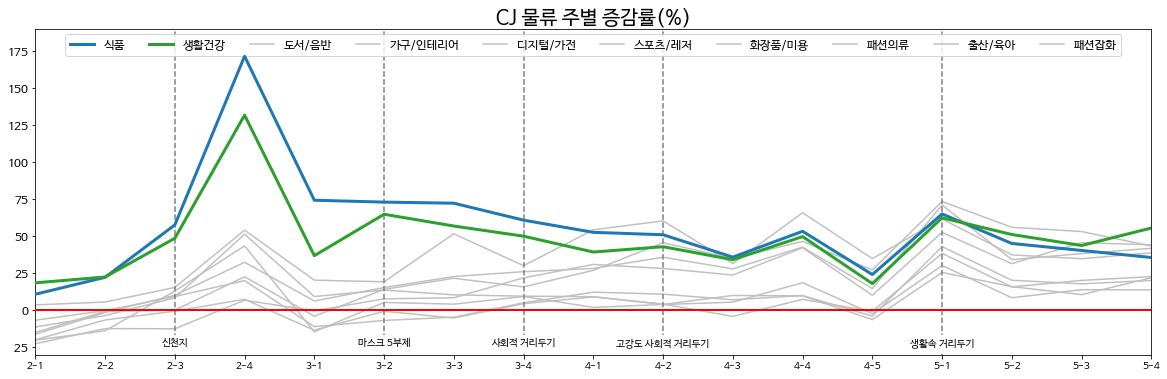

In [ ]:
# 전체 데이터 주차별 성장률
def issue_line(min, mycolor):
  plt.axhline(y=0,color='r',linestyle='-',linewidth=2,zorder=9)
  plt.axvline(x='2-3',color=mycolor,linestyle='--')
  plt.text('2-3',min,'신천지', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='3-2',color=mycolor,linestyle='--')
  plt.text('3-2',min, '마스크 5부제', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='3-4', color=mycolor,linestyle='--')
  plt.text('3-4',min, '사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='4-2', color=mycolor,linestyle='--')
  plt.text('4-2', min, '고강도 사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='5-1', color=mycolor,linestyle='--')
  plt.text('5-1',min,'생활속 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')

# 전체 데이터 주차별 성장률 그래프
plt.figure(figsize=(20, 6))
my_colors = ['#1f77b4', '#2ca02c'] #['#9467bd',  '#e377c2']#, ['#1f77b4', '#2ca02c'],'#ff7f0e
for i in range(len(list(cj_gr.columns)[:2])):
  plt.plot(cj_gr[list(cj_gr.columns)[i]],my_colors[i],linewidth=3,zorder=i+8)
for j in range(len(list(cj_gr.columns)[2:])):
  plt.plot(cj_gr[list(cj_gr.columns)[j+2]],color='silver',zorder=i-2)
plt.legend(cj_gr.columns)
plt.xlim('2-1','5-4')
plt.ylim(-30,190)
plt.yticks(fontsize=12)
# plt.ylabel('증감률(%)')
plt.legend(cj_gr.columns,loc='center',bbox_to_anchor=(0.5, 0.95),ncol=len(cj_gr.columns),fontsize=12)
min = cj_gr.values.min()
issue_line(min,'grey')

plt.title('CJ 물류 주별 증감률(%)',fontsize=20)

# **3. 클러스터별 주별 물류량 증감률**

In [ ]:
cj_c = CJ_C
cj_c = pd.merge(cj_c, dong, left_on='HDNG_NM', right_on='HDONG_NM').query("SIDO_NM=='서울'")
cj_c = cj_c .replace(np.nan, 0)
cj_c = cj_c.groupby(['DL_YMD','DL_GD_LCLS_NM','CLUS_NM']).sum().unstack()
cj_c = cj_c.unstack().droplevel(0,axis=1).fillna(0)

for i in ['노원구 대학가', '노원구 학원가','중구 빌딩숲', '중구 소상공']:
  cj_c.xs(i,axis=1,level=0).loc['2019-02-04',:] = (cj_c.xs(i,axis=1,level=0).loc['2019-02-11',:] + cj_c.xs(i,axis=1,level=0).loc['2019-02-18',:])/2
  cj_c.xs(i,axis=1,level=0).loc['2019-02-05',:] = (cj_c.xs(i,axis=1,level=0).loc['2019-02-12',:] + cj_c.xs(i,axis=1,level=0).loc['2019-02-19',:])/2
  cj_c.xs(i,axis=1,level=0).loc['2019-02-06',:] = (cj_c.xs(i,axis=1,level=0).loc['2019-02-13',:] + cj_c.xs(i,axis=1,level=0).loc['2019-02-20',:])/2

cj_c = cj_c.reset_index(drop=False)
cj_c = cj_c[cj_c.DL_YMD != '2019-02-01'] ; cj_c = cj_c[cj_c.DL_YMD != '2020-05-30'] ; cj_c = cj_c[cj_c.DL_YMD != '2020-05-31'] 
cj_c = cj_c.set_index('DL_YMD').stack()

In [ ]:
cj_c19 = cj_c.unstack().loc['2019-02-01':'2019-05-31',:]
cj_c20 = cj_c.unstack().loc['2020-02-01':'2020-05-31',:]
cj_c19 = cj_c19.resample('W-FRI').mean()
cj_c20 = cj_c20.resample('W-FRI').mean()
cj_c19.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']
cj_c20.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']
cj_c_gr = (cj_c20 - cj_c19)/cj_c19 *100
# cj_c_gr = cj_c_gr.stack().droplevel(0,axis=1)
cj_c_gr = cj_c_gr.T.reindex(cj_gr_cat_list,level=1)
cj_c_gr

2-1        2-2  ...        5-3        5-4
CLUS_NM DL_GD_LCLS_NM                        ...                      
노원구 대학가 식품              7.358447  20.630768  ...  30.784057  29.501249
        생활건강           13.523050  21.955498  ...  45.442091  58.285287
        도서/음반          -3.571899   2.152975  ...  36.887717  34.286711
        가구/인테리어       -21.898638  -1.663020  ...  53.658537  39.560440
        디지털/가전        -19.019592  -3.499006  ...  38.123570  37.838486
        스포츠/레저        -27.492063 -20.256776  ...  30.672926  38.560000
        화장품/미용        -14.899194  -1.655353  ...   9.331036  12.233265
        패션의류          -16.471148  -8.208396  ...  12.450921  14.854906
        출산/육아         -19.134396 -14.355231  ...  -0.236407  38.328530
        패션잡화          -25.325421  -4.292528  ...   9.944751  12.017995
노원구 학원가 식품              6.473025  21.561069  ...  33.846426  30.792353
        생활건강           16.670033  24.301811  ...  49.341743  63.525976
        도서/음반           4.580909   8.832596  ...  47.500451  60.227273
        가구/인테리어       -11.345748   6.679166  ...  62.312634  49.823054
        디지털/가전        -19.338120   0.613796  ...  42.473556  45.492203
        스포츠/레저        -27.338129 -14.446953  ...  40.791476  50.276243
        화장품/미용        -15.242617  -6.256795  ...  15.279785  15.625216
        패션의류            1.719717   8.089340  ...  13.140685  16.510276
        출산/육아         -14.024718 -13.205418  ...  10.303030  24.581725
        패션잡화          -26.344803  -7.078700  ...  15.474974  18.576573
중구 빌딩숲  식품             12.570152  11.913277  ...   8.437307   7.481327
        생활건강           38.692512  24.168150  ...  -9.461990  20.062305
        도서/음반          -5.125947  -7.378277  ...   1.242485 -14.080164
        가구/인테리어        -7.954545   2.447257  ...  18.070444  22.632794
        디지털/가전         -9.159992   4.842501  ...   9.026297  13.093210
        스포츠/레저        -10.363153  -5.607477  ...   8.176101  -2.564103
        화장품/미용         -5.296590  -3.201281  ...  -8.388388  -8.274384
        패션의류           -7.498081  -8.916859  ...  -7.414533  -0.312159
        출산/육아         -39.366516 -49.494949  ... -26.373626 -28.712871
        패션잡화           -5.660377 -14.788524  ...  25.998920  26.631237
중구 소상공  식품             16.136999  23.588191  ...  60.361483  44.637947
        생활건강           37.473067  45.975669  ...  33.490667  38.874431
        도서/음반           6.861187   7.834507  ...  40.299598  16.623315
        가구/인테리어       -16.280975   0.139470  ...  44.574369  47.623812
        디지털/가전        -10.905885  -3.467327  ...  42.088679  52.376600
        스포츠/레저        -23.667906  -2.585034  ...  38.338658  39.498433
        화장품/미용         -4.204730  -0.069950  ...  20.766418  23.510656
        패션의류           -7.477474  -5.717600  ...  16.272483  20.115357
        출산/육아         -22.108346   1.060071  ...  -9.090909  23.050847
        패션잡화           -6.517977   0.914699  ...  27.764375  26.545131

[40 rows x 17 columns]

In [ ]:
def issue_line_2(min, mycolor):
  plt.axhline(y=0,color='r',linestyle='-',linewidth=2,zorder=9)
  plt.axvline(x='2-3',color=mycolor,linestyle='--')
  plt.text('2-3',min,'신천지', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='3-2',color=mycolor,linestyle='--')
  plt.text('3-2',min, '마스크 5부제', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='3-4', color=mycolor,linestyle='--')
  plt.text('3-4',min+10, '사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='4-2', color=mycolor,linestyle='--')
  plt.text('4-2', min, '고강도 사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='5-1', color=mycolor,linestyle='--')
  plt.text('5-1',min,'생활속 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')


Text(0.5, 1.0, 'CJ 물류 노원구 대학가 주차별 증감률')

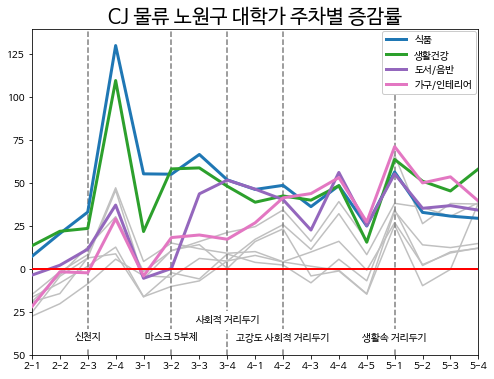

In [ ]:
# 노원구 대학가 주차별 성장률 그래프
plt.figure(figsize=(8, 6))
my_colors = ['#1f77b4', '#2ca02c','#9467bd',  '#e377c2'] # ['#1f77b4', '#2ca02c'],'#ff7f0e
for i in range(len(list(cj_gr.columns)[:4])):
  plt.plot(cj_c_gr.xs('노원구 대학가',axis=0,level=0).T[list(cj_gr.columns)[i]],my_colors[i],linewidth=3,zorder=i+6)
for j in range(len(list(cj_gr.columns)[4:])):
  plt.plot(cj_c_gr.xs('노원구 대학가',axis=0,level=0).T[list(cj_gr.columns)[j+4]],color='silver',zorder=i-4)

plt.xlim('2-1','5-4')
plt.ylim(-50,140)
# plt.legend(cj_gr.columns,loc='center',bbox_to_anchor=(0.5, 0.95),ncol=len(cj_gr.columns),fontsize=12)
plt.legend(cj_gr.columns[:4],loc='center',bbox_to_anchor=(0.89, 0.895),ncol=1,fontsize=10,framealpha=1)
min = -40
issue_line_2(min,'grey')
plt.title('CJ 물류 노원구 대학가 주차별 증감률',fontsize=20)

Text(0.5, 1.0, 'CJ 물류 노원구 학원가 주차별 증감률')

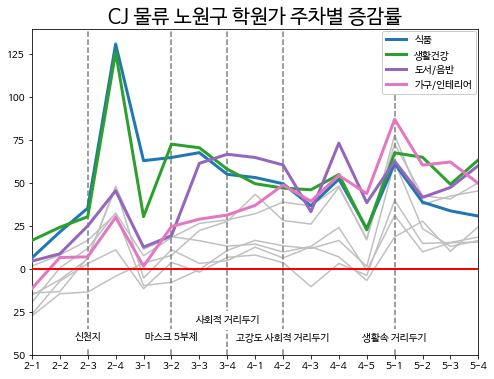

In [ ]:
# 노원구 학원가 주차별 성장률 그래프
plt.figure(figsize=(8, 6))
my_colors = ['#1f77b4', '#2ca02c','#9467bd',  '#e377c2'] # ['#1f77b4', '#2ca02c'],'#ff7f0e
for i in range(len(list(cj_gr.columns)[:4])):
  plt.plot(cj_c_gr.xs('노원구 학원가',axis=0,level=0).T[list(cj_gr.columns)[i]],my_colors[i],linewidth=3,zorder=i+6)
for j in range(len(list(cj_gr.columns)[4:])):
  plt.plot(cj_c_gr.xs('노원구 학원가',axis=0,level=0).T[list(cj_gr.columns)[j+4]],color='silver',zorder=i-4)

plt.xlim('2-1','5-4')
plt.ylim(-50,140)
# plt.legend(cj_gr.columns,loc='center',bbox_to_anchor=(0.5, 0.95),ncol=len(cj_gr.columns),fontsize=12)
plt.legend(cj_gr.columns[:4],loc='center',bbox_to_anchor=(0.89, 0.895),ncol=1,fontsize=10,framealpha=1)
min = -40
issue_line_2(min,'grey')

plt.title('CJ 물류 노원구 학원가 주차별 증감률',fontsize=20)

Text(0.5, 1.0, 'CJ 물류 중구 빌딩숲 주별 증감률')

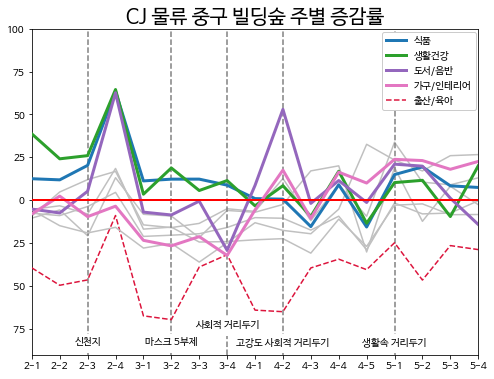

In [ ]:
# 중구 빌딩숲 주차별 성장률 그래프
plt.figure(figsize=(8, 6))
my_colors = ['#1f77b4', '#2ca02c','#9467bd',  '#e377c2'] 
for i in range(len(list(cj_gr.columns)[:4])):
  plt.plot(cj_c_gr.xs('중구 빌딩숲',axis=0,level=0).T[list(cj_gr.columns)[i]],my_colors[i],linewidth=3,zorder=i+6)
plt.plot(cj_c_gr.xs('중구 빌딩숲',axis=0,level=0).T[list(cj_gr.columns)[8]],color='crimson',linestyle='--',zorder=4)
for j in range(len(list(cj_gr.columns)[4:8])):
  plt.plot(cj_c_gr.xs('중구 빌딩숲',axis=0,level=0).T[list(cj_gr.columns)[j+4]],color='silver',zorder=i-4)

plt.plot(cj_c_gr.xs('중구 빌딩숲',axis=0,level=0).T[list(cj_gr.columns)[9]],color='silver',zorder=5)
plt.xlim('2-1','5-4')
plt.ylim(-90,100)
# plt.legend(cj_gr.columns,loc='center',bbox_to_anchor=(0.5, 0.95),ncol=len(cj_gr.columns),fontsize=12)
plt.legend(['식품','생활건강','도서/음반','가구/인테리어','출산/육아'],loc='center',bbox_to_anchor=(0.89, 0.87),ncol=1,fontsize=10,framealpha=1)
min = -83
issue_line_2(min,'grey')

plt.title('CJ 물류 중구 빌딩숲 주별 증감률',fontsize=20)

Text(0.5, 1.0, 'CJ 물류 중구 소상공 주별 증감률')

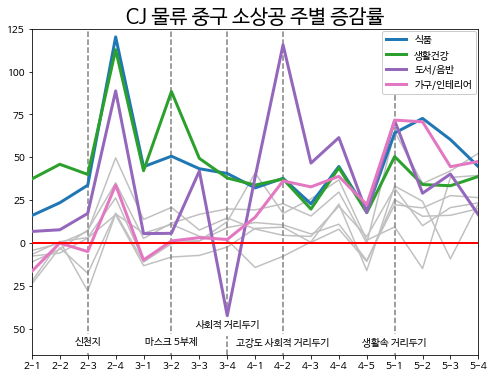

In [ ]:
# 중구 소상공 주차별 성장률 그래프
plt.figure(figsize=(8, 6))
my_colors = ['#1f77b4', '#2ca02c','#9467bd',  '#e377c2'] 
for i in range(len(list(cj_gr.columns)[:4])):
  plt.plot(cj_c_gr.xs('중구 소상공',axis=0,level=0).T[list(cj_gr.columns)[i]],my_colors[i],linewidth=3,zorder=i+6)
for j in range(len(list(cj_gr.columns)[4:])):
  plt.plot(cj_c_gr.xs('중구 소상공',axis=0,level=0).T[list(cj_gr.columns)[j+4]],color='silver',zorder=i-4)

plt.xlim('2-1','5-4')
plt.ylim(-65,125)
# plt.legend(cj_gr.columns,loc='center',bbox_to_anchor=(0.5, 0.95),ncol=len(cj_gr.columns),fontsize=12)
plt.legend(cj_gr.columns[:4],loc='center',bbox_to_anchor=(0.89, 0.895),ncol=1,fontsize=10,framealpha=1)
min = -58
issue_line_2(min,'grey')

plt.title('CJ 물류 중구 소상공 주별 증감률',fontsize=20)

In [ ]:
print('[클러스터별 평균 증감률]')
print('중구 빌딩숲   :',cj_c_gr.xs('중구 빌딩숲',axis=0,level=0).mean().mean())
print('중구 소상공   :',cj_c_gr.xs('중구 소상공',axis=0,level=0).mean().mean())
print('노원구 학원가 :',cj_c_gr.xs('노원구 학원가',axis=0,level=0).mean().mean())
print('노원구 대학가 :',cj_c_gr.xs('노원구 대학가',axis=0,level=0).mean().mean())

[클러스터별 평균 증감률]
중구 빌딩숲   : -4.288771844436869
중구 소상공   : 20.810758802613137
노원구 학원가 : 26.959951660667887
노원구 대학가 : 19.922881283437754
